# Neural Network: Galaxy vs Quasar classification

### WIP - Unfinished!!

## Time to get your hands dirty. Galaxies vs quasars with neural networks.

Let's go back to our galaxy vs quasar data we've used in a previous exercise. 

1. Read in SDSS galaxy color data from `solutions/galaxyquasar.csv`. Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 

2. Now we're going to fit a neural network classifier. First, scale your data appropriately and do a 30% train/test split.

3. Now train the classifier. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the [multilayer perceptron classifier](sklearn.neural_network.MLPClassifier) implemented in scikit-learn. My solution uses the latter, but this is an opportunity to pick the one you're most interested in learning. 

3. Start from a network architecture with a single hidden layer with 5 neurons, using the `adam` solver, the `relu` activation function, and a learninig rate of `0.001`. Plot the resulting ROC curve. 

4. Now let's optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do your best now to optimize the network architecture. Be creative!

5. Is your best result comparable with the simpler classifiers we've seen before? Do we need deep learning here? If yes, which features are captured best?


A few tips:

- In scikit-learn, remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.
- If it takes too long, run the hyperparameter optimization on a subset of the training set. Then retrain the full network using the best hyperparameters only.
- On cross validation, for scikit learn we've seen how to use `GridSearchCV` already. For Tensorflow, there's a really cool tool called [Tensorboard](https://www.tensorflow.org/tensorboard)

## Neural-Network creation steps

### 1. Libraries
### 2. Dataset fetch
### 3. Data preprocessing and reshaping
### 4. Initialize Neural Network
### 5. Build the model
### 6. Train the model
### 7. Predict

In [32]:
#1. Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV


from astropy.io import ascii
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12

In [2]:
#Ascii.read automatically exludes NaNs!
data = ascii.read('../solutions/galaxyquasar.csv', header_start=0)

In [3]:
data

u,g,r,i,z,class,z1,zerr
float64,float64,float64,float64,float64,str6,float64,float64
18.97213,18.53676,18.5828,18.34936,18.29215,QSO,0.5228189,0.0001547483
19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.1228459,2.816076e-05
19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.0,0.0
19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.1474355,9.310701e-06
19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.0006307968
17.60994,15.90911,15.0209,14.54955,14.19971,GALAXY,0.04619161,1.022329e-05
18.50014,17.42286,17.03657,16.76236,16.63258,GALAXY,0.0516851,6.667251e-06
19.53253,19.49823,19.42254,19.07912,18.90426,QSO,1.88844,0.0005242734
19.37014,17.94086,17.154,16.74367,16.42825,GALAXY,0.137445,1.284492e-05


In [6]:
u_g = (data['u'] - data['g'])[:, None]
g_r = (data['g'] - data['r'])[:, None]
r_i = (data['r'] - data['i'])[:, None]
i_z = (data['i'] - data['z'])[:, None]

#Initializing fitting dataset
tofit = np.column_stack([u_g, g_r, r_i, i_z])

#Quasar = 1, Galaxy = 0
label = np.where(data['class'] == 'QSO', 1, 0)

In [11]:
# 3. Data Preprocessing
#Centering fitting data in [0, 1] -> Easier for the Neural Network to work with!
sc = StandardScaler()
tofit = sc.fit_transform(tofit)

#30% train/test split
size = 0.3

#Splicing into training and test subsets
xtest, xtrain, ytest, ytrain = train_test_split(tofit, label, test_size=size)

In [25]:
#4. Initializing NN

clf = MLPClassifier(
    hidden_layer_sizes=(10),
    activation = 'relu',
    solver = 'adam',
    learning_rate_init = 0.001,
    max_iter = 200,
    shuffle = True)

In [17]:
#5. Fitting the NN
clf.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=10)

In [20]:
#6. Predicting
ypred = clf.predict_proba(xtest)[:, 1]

(0.9, 1.0)

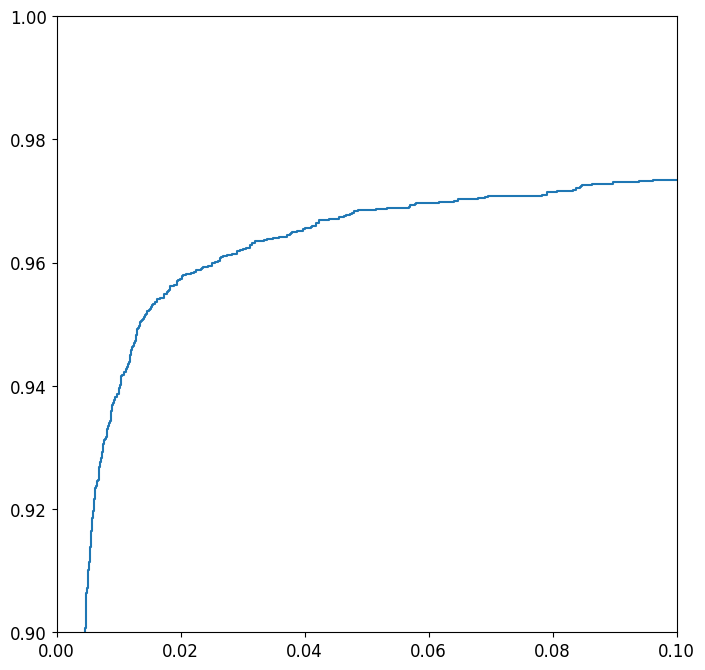

In [21]:
fpr, tpr, thresh = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim(0, 0.1)
plt.ylim(0.9, 1)

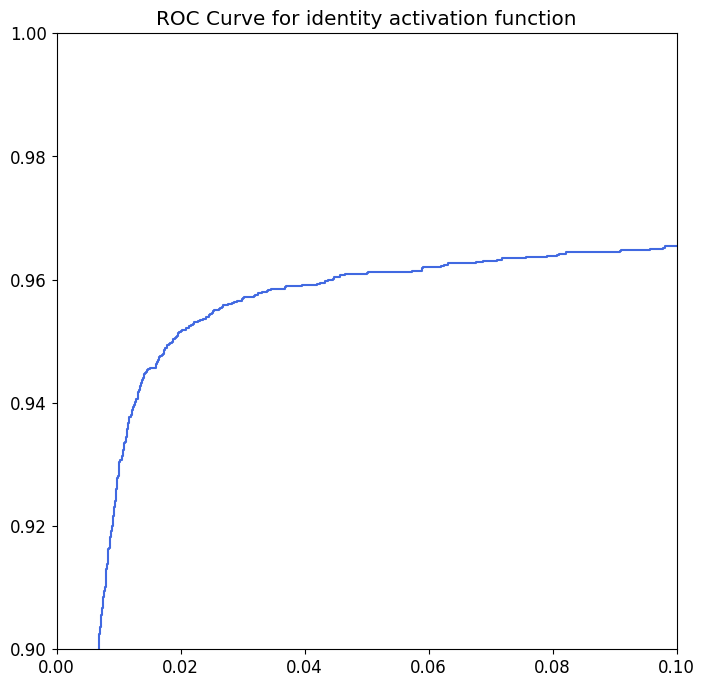

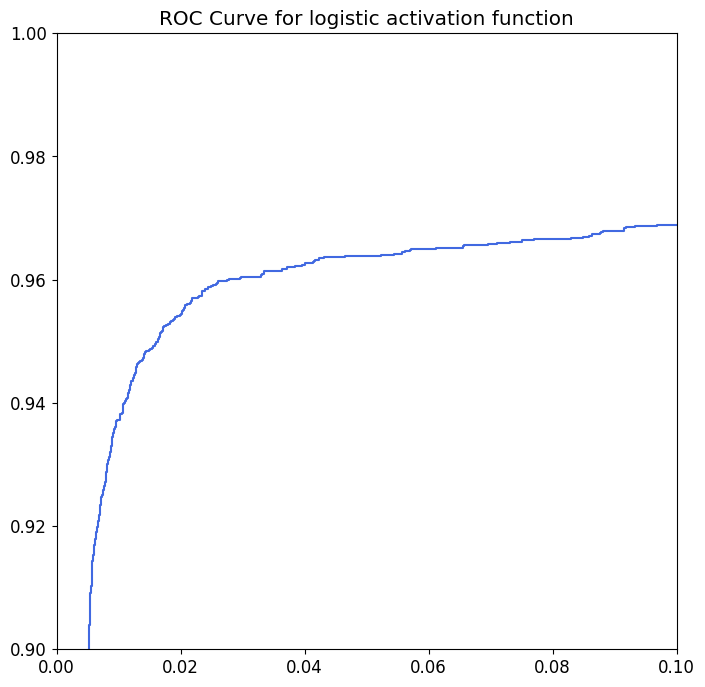

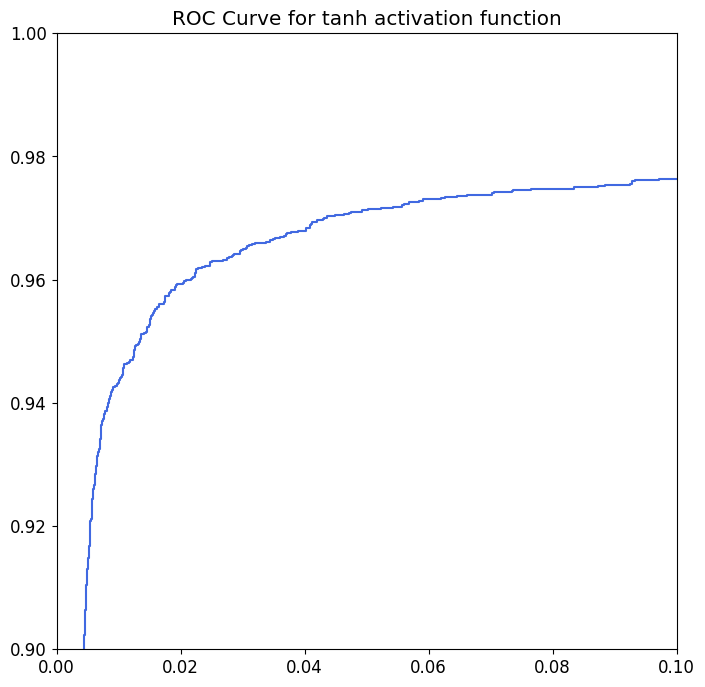

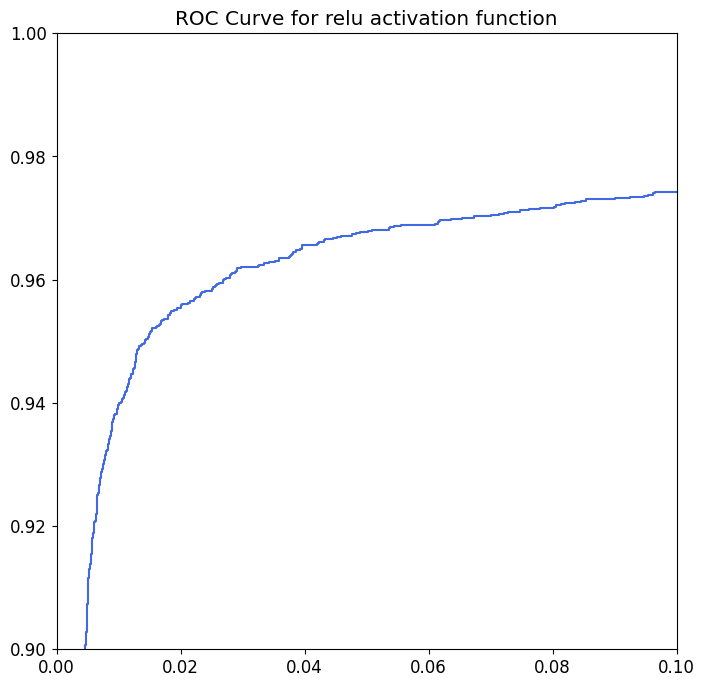

In [27]:
#Optimizing Activation Function as one of the hyperparameters
act_funcs = ['identity', 'logistic', 'tanh', 'relu']

#‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

#‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

#‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

#‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

for i in range(len(act_funcs)):
    #Current Activation Function
    now = act_funcs[i]

    #Neural Network
    clf = MLPClassifier(
    hidden_layer_sizes=(10),
    activation = now,
    solver = 'adam',
    learning_rate_init = 0.001,
    max_iter = 200,
    shuffle = True)

    clf.fit(xtrain, ytrain)
    ypred = clf.predict_proba(xtest)[:, 1]
    
    fpr, tpr, thresh = roc_curve(ytest, ypred)
    plt.title(f'ROC Curve for {now} activation function')
    plt.plot(fpr, tpr, c='royalblue')
    plt.xlim(0, 0.1)
    plt.ylim(0.9, 1)
    plt.show()

In [37]:
#Now some Cross Validation!
best = GridSearchCV(MLPClassifier(), param_grid=)

SyntaxError: invalid syntax (2725326640.py, line 2)